In [114]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [147]:
class DNN(nn.Module):
  def __init__(self,n_input,hidden_1,n_out) -> None:
    super().__init__()
    self.linear1 = nn.Linear(n_input,hidden_1)
    self.linear2 = nn.Linear(hidden_1,n_out)

  def forward(self,x):
    x =nn.functional.relu(self.linear1(x))
    x = self.linear2(x)
    return x

In [148]:
x = torch.tensor([[3,5],
                  [5,1],
                 [10,2]],dtype=torch.float32)
y = torch.tensor([[75],[82],[93]],dtype=torch.float32)

n_input=2
hidden_1 =2
n_out =1

In [149]:
model = DNN(n_input,hidden_1,n_out)
print(model)

DNN(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)


In [150]:
print(model.linear1.weight)
print(model.linear2.weight)

Parameter containing:
tensor([[-0.5781, -0.3494],
        [ 0.1383, -0.6397]], requires_grad=True)
Parameter containing:
tensor([[-0.4551,  0.2205]], requires_grad=True)


In [152]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.009)
lossfunction = nn.L1Loss()
losses = []
for epoch in range(100):
  yp = model(x)
  loss = lossfunction(y,yp)
  losses.append(loss.item())
  model.zero_grad()
  loss.backward()
  optimizer.step()

print(losses)

[83.998291015625, 83.97745513916016, 83.95629119873047, 83.93468475341797, 83.91254425048828, 83.88976287841797, 83.8662109375, 83.8417739868164, 83.81633758544922, 83.78972625732422, 83.7618408203125, 83.73249816894531, 83.70153045654297, 83.66876220703125, 83.63400268554688, 83.59703826904297, 83.5576171875, 83.51551818847656, 83.470458984375, 83.4221420288086, 83.37024688720703, 83.31441497802734, 83.25426483154297, 83.18938446044922, 83.11930847167969, 83.04354095458984, 82.9615249633789, 82.87267303466797, 82.77632141113281, 82.67176818847656, 82.55821990966797, 82.43480682373047, 82.30062103271484, 82.15460968017578, 81.99566650390625, 81.82255554199219, 81.6339340209961, 81.42833709716797, 81.20413208007812, 80.9329833984375, 80.57210540771484, 80.16949462890625, 79.71981811523438, 79.21713256835938, 78.65474700927734, 78.02520751953125, 77.32010650634766, 76.53007507324219, 75.64453887939453, 74.65167999267578, 73.53821563720703, 72.28921508789062, 70.8879623413086, 69.31565093

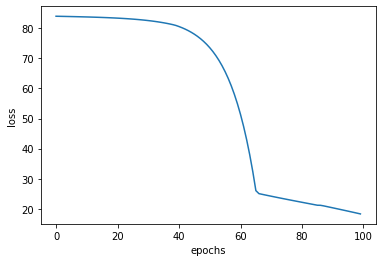

In [153]:
plt.plot(losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
# Saving the pre-trained model to disk
torch.save(model.state_dict(),"nn.model.pth")